In [1]:
import os
from gquant.dataframe_flow import TaskGraph

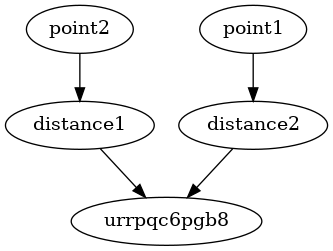

In [2]:
task_graph = TaskGraph.load_taskgraph('../../workflow/test_two_modules.gq.yaml')
task_graph.draw(show='ipynb')


In [6]:
e=task_graph.draw()

In [7]:
e

GQuantWidget(sub=HBox(), value=[OrderedDict([('id', 'point2'), ('type', 'PointNode'), ('conf', {'npts': 100}),…

In [5]:
e.value

[{'id': 'points_task',
  'type': 'PointNode',
  'conf': {'npts': 80},
  'inputs': {}},
 {'id': 'numba',
  'type': 'NumbaDistanceNode',
  'conf': {},
  'inputs': {'points_df_in': 'points_task.points_df_out'}},
 {'id': 'cupy',
  'type': 'CupyDistanceNode',
  'conf': {},
  'inputs': {'points_df_in': 'points_task.points_df_out'}},
 {'id': 'verify',
  'type': 'VerifyNode',
  'conf': {'df1_col': 'distance_numba', 'df2_col': 'distance_cupy'},
  'inputs': {'df1': 'numba.distance_df', 'df2': 'cupy.distance_df'}},
 {'id': 'cudf',
  'type': 'DistanceNode',
  'conf': {},
  'inputs': {'points_df_in': 'points_task.points_df_out'}},
 {'id': 'verify2',
  'type': 'VerifyNode',
  'conf': {'df1_col': 'distance_cupy', 'df2_col': 'distance_cudf'},
  'inputs': {'df1': 'cupy.distance_df', 'df2': 'cudf.distance_df'}},
 {'id': '',
  'type': 'Output Collector',
  'conf': {},
  'inputs': {'in1': 'verify2.max_diff', 'in2': 'verify.max_diff'}}]

In [3]:
task_graph.run(formated=True)

{'urrpqc6pgb8.max_diff': 'in1', 'distance1.distance_df': 'in2'}
{'in2':            x         y  distance_cudf
0   0.771800  0.789862       1.104336
1   0.274501  0.910799       0.951265
2   0.348695  0.986341       1.046163
3   0.425219  0.592938       0.729649
4   0.746635  0.991285       1.241012
..       ...       ...            ...
95  0.292281  0.115579       0.314304
96  0.198417  0.012841       0.198832
97  0.917497  0.686840       1.146102
98  0.467759  0.573399       0.739990
99  0.101533  0.210398       0.233616

[100 rows x 3 columns], 'in1': 1.0040896934019772}
[{'from_node': <NodeInTaskGraph custom_port_nodes.VerifyNode object at 0x7fdf30e13210>, 'from_port': 'max_diff', 'to_port': 'in1'}, {'from_node': <NodeInTaskGraph custom_port_nodes.DistanceNode object at 0x7fdf30e79110>, 'from_port': 'distance_df', 'to_port': 'in2'}]


In [4]:

out_list = [
    'verify.max_diff', 'verify2.max_diff'
]

diff = task_graph.run(out_list)

{'verify.max_diff': 'verify.max_diff', 'verify2.max_diff': 'verify2.max_diff'}
{'verify.max_diff': 0.0, 'verify2.max_diff': 2.220446049250313e-16}
[{'from_node': <NodeInTaskGraph custom_port_nodes.VerifyNode object at 0x7fbba654c410>, 'from_port': 'max_diff', 'to_port': 'verify.max_diff'}, {'from_node': <NodeInTaskGraph custom_port_nodes.VerifyNode object at 0x7fbba64effd0>, 'from_port': 'max_diff', 'to_port': 'verify2.max_diff'}]


In [5]:
diff

Results([('verify.max_diff', 0.0), ('verify2.max_diff', 2.220446049250313e-16)])

In [8]:
task_graph.save_taskgraph('workflow/test_run.gq.yaml')


In [9]:
task_graph

In [10]:
for i in task_graph:
    print(i)

In [14]:
i.set

AttributeError: 'Task' object has no attribute 'set'